# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.11.0


# Creating data to view and fit

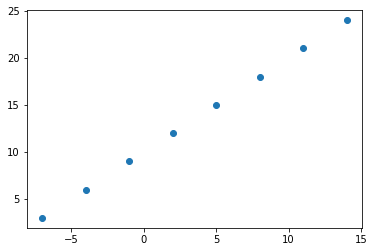

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [5]:
# Turn our numpyt arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [6]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model usiong the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 723ms/step - loss: 16.6995 - mae: 16.6995
Epoch 2/50
1/1 [==============================] - 0s 9ms/step - loss: 16.4183 - mae: 16.4183
Epoch 3/50
1/1 [==============================] - 0s 9ms/step - loss: 16.1370 - mae: 16.1370
Epoch 4/50
1/1 [==============================] - 0s 15ms/step - loss: 15.8558 - mae: 15.8558
Epoch 5/50
1/1 [==============================] - 0s 10ms/step - loss: 15.5745 - mae: 15.5745
Epoch 6/50
1/1 [==============================] - 0s 10ms/step - loss: 15.2933 - mae: 15.2933
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 15.0120 - mae: 15.0120
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 14.7943 - mae: 14.7943
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 14.6618 - mae: 14.6618
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 14.5293 - mae: 14.5293
Epoch 11/50
1/1 [==============================] - 0s 11ms/ste

In [7]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
# Try and make a prediction using our model
model.predict([37.0])

1/1 [==============================] - 0s 143ms/step


array([[41.93036]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all caled neurons), within each of the hidden layers, change the activation function of each layers.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [9]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.2326 - mae: 14.2326
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4435 - mae: 13.4435
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 12.6547 - mae: 12.6547
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8662 - mae: 11.8662
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0770 - mae: 11.0770
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2859 - mae: 10.2859
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 9.4915 - mae: 9.4915
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.6921 - mae: 8.6921
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.8858 - mae: 7.8858
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 7.0708 - mae: 7.0708
Epoch 11/100
1/1 [==============================] - 0s 10ms

In [10]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 130ms/step


array([[27.275007]], dtype=float32)

2/2 [==============================] - 0s 8ms/step


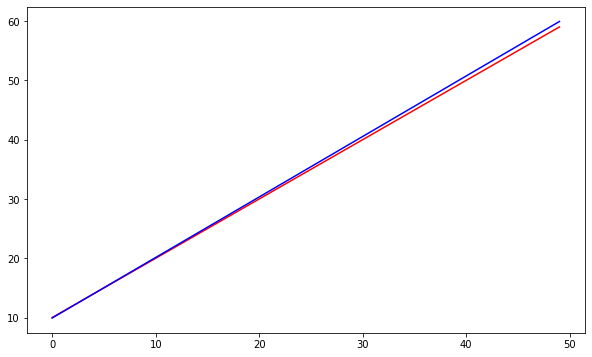

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(0, 50, 1)
ax.plot(x, x + 10, c="r")
ax.plot(x, model.predict(x), c="b");

# Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... There are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize::
* the data = what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [13]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [14]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

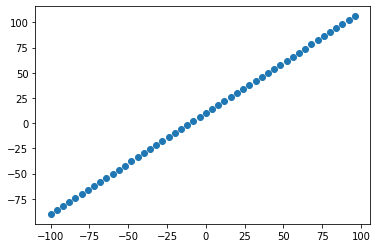

In [15]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this set of data, which is typically 10-15% of the data available
* **Test set** - the model gets evaluated on this data to test what it has elarned, this set is typically 10-15% of the total data available.

In [16]:
# Check the length of how many samples we have
len(X)

50

In [17]:
# Split the data into train and test sets
X_train = X[:40] # 80% of the data
y_train = y[:40]
X_test = X[40:] # last 20% of data
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data
Now we've got our data split intro training and test sets... let's visualize it again.

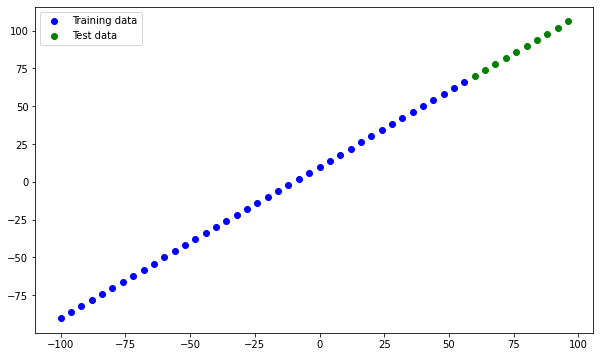

In [19]:
plt.figure(figsize=(10, 6))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend();

In [20]:
# Let's have a look at how to build a neural network for our data

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) 

### Visualizing the model

In [32]:
# Let's create a model which builds automatically the input_shape argument in the first layer
tf.random.set_seed(42)

# Creaet a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [33]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [34]:
# Lets fit our model to training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [35]:
# Get a summary of our model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


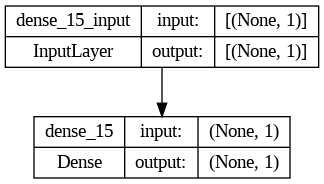

In [39]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions